### 딥러닝 모델로 회귀하기: 와인 데이터

#### 데이터 가져오기, 머신러닝 복습

In [15]:
# 로컬 파일에서 데이터 가져오기

import pandas as pd

# CSV 파일 읽기
df = pd.read_csv("../wine.csv")

print(df.head())  # 데이터 확인

   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  


In [16]:
# 데이터 train, test 나누기

from sklearn.model_selection import train_test_split  # 데이터 분할 함수
from sklearn.preprocessing import StandardScaler  # 데이터 표준화 함수

# [데이터 제작]
X = df.drop(columns=["Alcohol"])
y = df["Alcohol"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # test_size: 전체 데이터 중 test에 할당할 비율


In [17]:
# 데이터로 머신러닝 회귀 모델 학습, 평가

from sklearn.metrics import mean_squared_error  # MSE 평가 함수


# [DTR 모델]
from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)

dtr_y_pred = dtr_model.predict(X_test)

mse = mean_squared_error(y_test, dtr_y_pred)
print(f"DTR 모델 mse: {mse:.2f}")


# [RFR 모델]
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_train)

rfr_y_pred = rfr_model.predict(X_test)

mse = mean_squared_error(y_test, rfr_y_pred)
print(f"RFR 모델 mse: {mse:.2f}")


# [SVR 모델]
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train, y_train)

svr_y_pred = svr_model.predict(X_test)

mse = mean_squared_error(y_test, svr_y_pred)
print(f"SVR 모델 mse: {mse:.2f}")


# [LR 모델]
from sklearn.linear_model import LinearRegression

# 모델 생성, 학습(= 훈련)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 예측, 평가
lr_y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, lr_y_pred)
print(f"LR 모델 mse: {mse:.2f}")

DTR 모델 mse: 0.39
RFR 모델 mse: 0.14
SVR 모델 mse: 0.15
LR 모델 mse: 0.17


#### 딥러닝 시작

In [ ]:
# 원-핫 인코딩, 딥러닝 입력을 위해 Numpy로 변환

# Y = pd.get_dummies(y).values # 원-핫 인코딩 코드. 회귀 문제이고, y가 연속적인 숫자값을 가지고 있기 때문에 one-hot 인코딩 없이 바로 사용해야 함.
Y = y.values # Numpy로 변환만
print(Y[:5])

# X = X.values # 딥러닝 입력을 위해 Numpy로 변환(but X는 이미 StandardScaler로 인해 Numpy 배열이 되었기 때문에 변환할 필요 없음)
print(X[:5])

[14.23 13.2  13.16 14.37 13.24]
[[-1.21394365 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
   1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
   1.01300893]
 [-1.21394365 -0.49941338 -0.82799632 -2.49084714  0.01814502  0.56864766
   0.73362894 -0.82071924 -0.54472099 -0.29332133  0.40605066  1.1134493
   0.96524152]
 [-1.21394365  0.02123125  1.10933436 -0.2687382   0.08835836  0.80899739
   1.21553297 -0.49840699  2.13596773  0.26901965  0.31830389  0.78858745
   1.39514818]
 [-1.21394365 -0.34681064  0.4879264  -0.80925118  0.93091845  2.49144552
   1.46652465 -0.98187536  1.03215473  1.18606801 -0.42754369  1.18407144
   2.33457383]
 [-1.21394365  0.22769377  1.84040254  0.45194578  1.28198515  0.80899739
   0.66335127  0.22679555  0.40140444 -0.31927553  0.36217728  0.44960118
  -0.03787401]]


In [23]:
# train, test 분리

from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((142, 13), (142,), (36, 13), (36,))

손실함수

- Binary Crossentropy

이 손실 함수는 이진 분류 문제(binary classification)에 사용됩니다. 여기서 모델은 단 두 개의 클래스 중 하나를 예측해야 합니다. 보통 시그모이드 활성화 함수(sigmoid activation function)를 출력 계층에 사용합니다. 이 함수는 0과 1 사이의 값을 반환하여, 각 클래스에 속할 확률을 나타냅니다.

- Categorical Crossentropy

다중 클래스 분류 문제(multi-class classification)에 사용됩니다. 모델은 두 개 이상의 클래스 중 하나를 예측해야 합니다 소프트맥스 활성화 함수(softmax activation function)가 일반적으로 사용됩니다. 이 함수는 모든 클래스에 대해 확률 분포를 반환하여, 각 클래스에 속할 확률을 나타냅니다.

In [41]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(13,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 8)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,063 (19.78 KB)

 Trainable params: 5,063 (19.78 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 170.2650 - mse: 170.2650 - val_loss: 164.8733 - val_mse: 164.8733
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 158.3441 - mse: 158.3441 - val_loss: 151.9303 - val_mse: 151.9303
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 145.3511 - mse: 145.3511 - val_loss: 129.6398 - val_mse: 129.6398
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 121.0806 - mse: 121.0806 - val_loss: 93.0167 - val_mse: 93.0167
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 85.5801 - mse: 85.5801 - val_loss: 49.5731 - val_mse: 49.5731
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 43.0500 - mse: 43.0500 - val_loss: 23.5158 - val_mse: 23.5158
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 23.6604 - mse: 23.6604 - val_loss: 18.5490 - val_mse: 18.5490
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 19.5765 - mse: 19.5765 - val_loss: 16.8119 - val_mse: 16.8119
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━

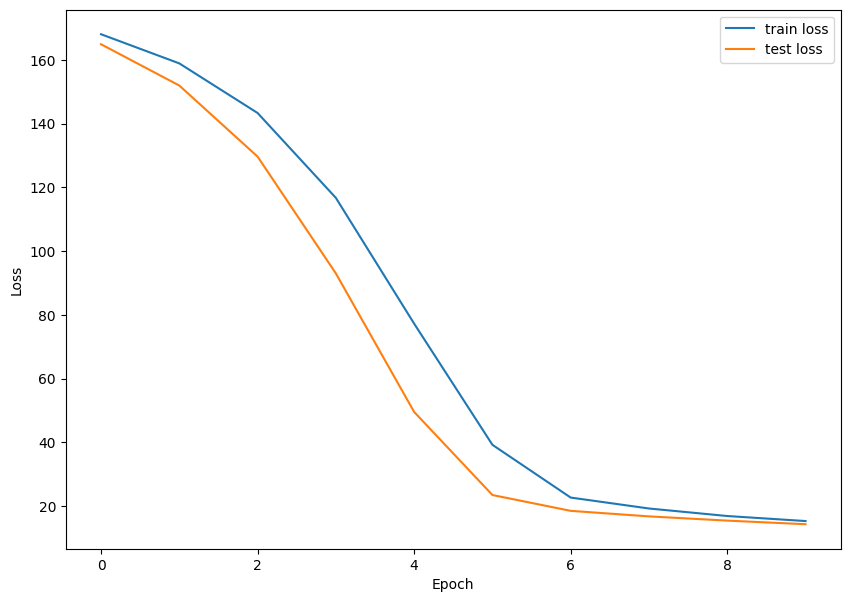

In [43]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 14.4099 - mse: 14.4099


[14.356212615966797, 14.356212615966797]